In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import json
import Data_Processing as dp
import matplotlib.pyplot as plt
import seaborn as sns
import ScRNA_Data_Processing as sdp
import itertools

In [22]:
batch_size =10
tpca_pred_info = np.empty((10, 2))
gene_count_info = np.empty((10, 40))
gene_info = np.empty((10, 5))
gene_pair_corr_info = np.empty((10, 9))

y = np.empty((10), dtype=float)
true_pairs = np.empty((10), dtype=float) 
weights = np.empty((10), dtype=float)

prior = np.empty((batch_size, 1))

length = np.empty((batch_size, 2))
gravy = np.empty((batch_size, 2))
molecular_weight = np.empty((batch_size, 2))
aromaticity = np.empty((batch_size, 2))
instability_index = np.empty((batch_size, 2))
isoelectric_point = np.empty((batch_size, 2))
secondary_structure_fraction = np.empty((batch_size, 6))

domains = np.empty((batch_size, 4))
families = np.empty((batch_size, 4))
clans = np.empty((batch_size, 4))

other_info_dict = {}

other_info_dict['prior'] = prior

other_info_dict['length'] = length
other_info_dict['gravy'] = gravy
other_info_dict['molecular_weight'] = molecular_weight
other_info_dict['aromaticity'] = aromaticity
other_info_dict['instability_index'] = instability_index
other_info_dict['isoelectric_point'] = isoelectric_point
other_info_dict['secondary_structure_fraction'] = secondary_structure_fraction

other_info_dict['domains'] = domains
other_info_dict['families'] = families
other_info_dict['clans'] = clans


out = tpca_pred_info, gene_info, gene_pair_corr_info, gene_count_info, y, true_pairs, weights

weights = out[-1]
true_pairs = out[-2]
y = out[-3]
base = np.concatenate(out[0:-3], axis=-1)


prior = other_info_dict['prior']

length = other_info_dict['length']
gravy = other_info_dict['gravy']
molecular_weight = other_info_dict['molecular_weight']
aromaticity = other_info_dict['aromaticity']
instability_index = other_info_dict['instability_index']
isoelectric_point = other_info_dict['isoelectric_point']
secondary_structure_fraction = other_info_dict['secondary_structure_fraction']

props = np.concatenate((length, gravy, molecular_weight, aromaticity,
                    instability_index, isoelectric_point, secondary_structure_fraction), axis=-1)



domains = other_info_dict['domains']
families = other_info_dict['families']
clans = other_info_dict['clans']
pfam = np.concatenate((domains, families, clans), axis=-1)


lr1 = base
lr2 = np.concatenate((base, props), axis=-1)
lr3 = np.concatenate((base, pfam), axis=-1)
lr4 = np.concatenate((base, prior), axis=-1)
lr5 = np.concatenate((base, props, pfam), axis=-1)
lr6 = np.concatenate((base, prior, pfam), axis=-1)
lr7 = np.concatenate((base, prior, props), axis=-1)
lr8 = np.concatenate((base, prior, props, pfam), axis=-1)

X = (lr1,lr2,lr3,lr4,lr5,lr6,lr7,lr8)
np.shape(X[0])

(10, 56)

In [53]:
val = 0
foo = np.nan_to_num([(np.log(val) - np.log(val))])
foo


C:\Users\tavis\AppData\Local\Temp\ipykernel_9888\4002721170.py:2: RuntimeWarning: divide by zero encountered in log
  foo = np.nan_to_num([(np.log(val) - np.log(val))])
C:\Users\tavis\AppData\Local\Temp\ipykernel_9888\4002721170.py:2: RuntimeWarning: invalid value encountered in double_scalars
  foo = np.nan_to_num([(np.log(val) - np.log(val))])


array([0.])

In [2]:
# def create_train_test_split(train_percent=0.5, relv_prots=None):
#     gene_id_dict_raw = dp.load_object('./data/Biogrid/gene_dict_Homo_sapiens')
#     gene_id_dict = dp.convert_gene_dict(gene_id_dict_raw, name_convention='an')
#     prot_set = list(set(gene_id_dict.keys()))
#     if relv_prots:
#         prot_set = [prot for prot in prot_set if prot in relv_prots]
    
#     assignments = np.random.normal(size=len(prot_set))
#     prot_assignments = list(zip(prot_set,assignments)) 
    
#     train_prots = [pair[0] for pair in prot_assignments if pair[1]<=train_percent]
#     test_prots = [pair[0] for pair in prot_assignments if pair[1]>train_percent]
    
#     return train_prots, test_prots
    
# train,test = create_train_test_split(train_percent=0.8, relv_prots=None)

# dp.save_object(train, './scRNA_data/gold_standard/train_prot_set_20221019')
# dp.save_object(test, './scRNA_data/gold_standard/test_prot_set_20221019')

In [ ]:
# tan_k562_curve_dict, foo = dp.create_tan_curve_dict('./data/Tan_et_al_data/aan0346_Tables_S7.csv',header=2)
# tan_hek293t_curve_dict, foo = dp.create_tan_curve_dict('./data/Tan_et_al_data/aan0346_Tables_S21.csv',header=2)
# curve_dict = dp.mix_curve_dicts(tan_k562_curve_dict,tan_hek293t_curve_dict,ratio=(1,1))
# print(len(tan_k562_curve_dict),len(tan_hek293t_curve_dict),len(k562_hek293t_curve_dict))

In [42]:
curve_dict = dp.create_prot_int_dict('./data/processed_hcmv_dict',
                                       './data/hsv1_hcmv_gene_id_dict_adjusted', 'A','0')
# pred_dict = dp.dat_to_dict('./data/hcmv_weighted_pred_dict_A_hpi_0.dat')

In [43]:
# load in the processed 1:1:1 mix data
adata = sc.read('./scRNA_data/Zhao_2022/GSM3689514_Mix3_HEK293T_K562.h5ad')
table = pd.read_csv('./scRNA_data/Zhao_2022/GSM3689514_Mix3_HEK293T_K562.csv.gz', index_col=0)
gene_dict,cell_dict = sdp.build_gene_and_cell_dict(adata,table)


D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


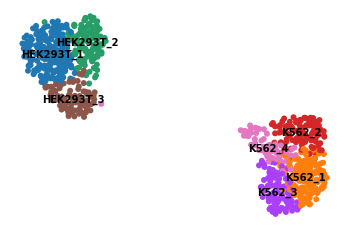

In [19]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, return_fig=True)
plt.savefig('./scRNA_data/Zhao_2022/Mix3_umap.png',bbox_inches='tight')

In [4]:
# gene_dict = sdp.convert_gene_dict_to_prots(gene_dict)

In [44]:
relv_cell_dict = sdp.merge_cell_dict_clusters(cell_dict,master_groups=['K562','HEK'])

In [45]:
relv_cell_dict = sdp.add_pseudobulk_cells_to_cell_dict(relv_cell_dict, master_groups=['K562','HEK'])

In [46]:
relv_cell_dict = sdp.normalize_cell_dict(relv_cell_dict, 1e4)

In [47]:
relv_cell_dict = sdp.convert_cell_dict_to_prots(relv_cell_dict)

In [48]:
#Find How many overlaping genes/prots we have; gene->prot
relv_prots = sdp.get_tpca_scrna_overlap(gene_dict,curve_dict,conversion_direction='gp')
print(len(relv_prots))

2606


In [49]:
train_prots = dp.load_object('./scRNA_data/gold_standard/train_prot_set_20221019')
test_prots = dp.load_object('./scRNA_data/gold_standard/test_prot_set_20221019')

print(len(train_prots),len(test_prots))
train_list = [prot for prot in relv_prots if prot in train_prots]
test_list = [prot for prot in relv_prots if prot in test_prots]

print(len(train_list),len(test_list), len(train_list)/(len(train_list)+len(test_list)))

13749 3672
2018 588 0.7743668457405987


In [20]:
train_dict, test_dict = sdp.build_relv_gold_standard(train_list,test_list,pred_dict)
print(len(train_dict),len(test_dict))

In [14]:
def build_relv_gold_standard(train_set,test_set,tpca_network_dict):
    def helper(pairs,val_dict):
        out_dict = {}
        for pair in pairs:
            if pair in val_dict:
                out_dict[pair] = val_dict[pair]
            elif (pair[1],pair[0]) in val_dict:
                out_dict[pair[1],pair[0]] = val_dict[pair[1],pair[0]]
        return out_dict
    
    train_pairs, test_pairs = create_train_test_pairs(train_set,test_set)
    train_dict = helper(train_pairs,tpca_network_dict)
    test_dict = helper(train_pairs,tpca_network_dict)
    
    print(len(train_pairs),len(train_dict))
    print(len(test_pairs),len(test_dict))
    
    return train_dict, test_dict




In [11]:
def get_tpca_scrna_overlap(gene_dict,tpca_dict,conversion_direction='gp'):
    if conversion_direction == 'gp':
        gene_id_dict_raw = dp.load_object('./data/Biogrid/gene_dict_Homo_sapiens')
        gene_id_dict = dp.convert_gene_dict(gene_id_dict_raw, name_convention='na')
        sc_prots = set([gene_id_dict[gene.split('_')[-1]] for gene in gene_dict.keys() if gene.split('_')[-1] in gene_id_dict])
        relv_prots = [gene for gene in tpca_dict.keys() if gene in sc_prots]
    else:
        gene_id_dict_raw = dp.load_object('./data/Biogrid/gene_dict_Homo_sapiens')
        gene_id_dict = dp.convert_gene_dict(gene_id_dict_raw, name_convention='an')
        tpca_prots = set([gene_id_dict[prot] for prot in tpca_dict.keys() if prot in gene_id_dict])
        relv_prots = [gene.split('_')[-1] for gene in gene_dict.keys() if gene.split('_')[-1] in tpca_prots]

    return relv_prots

In [12]:
def create_train_test_pairs(train_prots,test_prots):
    train_pairs = list(itertools.combinations(train_prots, 2))
    test_pairs = list(itertools.combinations(test_prots, 2))
    
    return train_pairs, test_pairs
    

In [10]:
train_pairs, test_pairs = create_train_test_pairs(train_list,test_list)
print(len(train_pairs),len(test_pairs))

12880350 1004653


In [35]:
# load in the processed 1:1:1 mix data
adata = sc.read('./scRNA_data/Zhao_2022/GSM3689514_Mix3_HEK293T_K562.h5ad')
# Marker Genes from Paper "Dissecting the multicellular ecosystem of metastatic melanoma by single-cell RNA-seq"
table = pd.read_csv('./scRNA_data/Tirosh_2016/aad0501_table_s5.csv', header=6)
g1_s_markers = [thing.replace(' ','') for thing in list(table['G1/S']) if type(thing)==str]
g2_m_markers = [thing.replace(' ','') for thing in list(table['G2/M']) if type(thing)==str]


In [36]:
sc.tl.score_genes_cell_cycle(adata, s_genes=g1_s_markers, g2m_genes=g2_m_markers)


D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\tools\_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\tools\_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


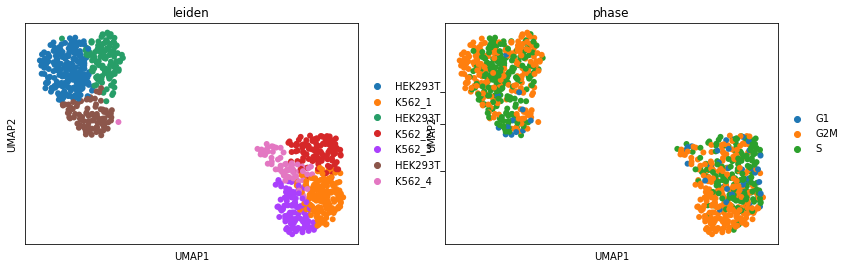

In [38]:
sc.pl.umap(adata, color=['leiden','phase'], use_raw=True)


D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\tools\_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\tools\_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


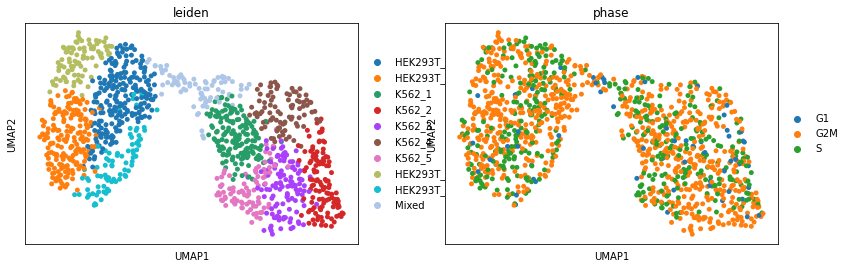

In [39]:
adata = sc.read('./scRNA_data/Zhao_2022/GSM3689513_Mix4_HEK293T_K562.h5ad')
# Marker Genes from Paper "Dissecting the multicellular ecosystem of metastatic melanoma by single-cell RNA-seq"
table = pd.read_csv('./scRNA_data/Tirosh_2016/aad0501_table_s5.csv', header=6)
g1_s_markers = [thing.replace(' ','') for thing in list(table['G1/S']) if type(thing)==str]
g2_m_markers = [thing.replace(' ','') for thing in list(table['G2/M']) if type(thing)==str]
sc.tl.score_genes_cell_cycle(adata, s_genes=g1_s_markers, g2m_genes=g2_m_markers)
sc.pl.umap(adata, color=['leiden','phase'], use_raw=True)


In [2]:
import multiprocessing
num_cores = multiprocessing.cpu_count()
num_cores

8

In [3]:
# task that operates on an item
def task(item1,item2):
    print('In Task')
    # do one thing using item
    # do another thing using item
    ans = item1+item2
    return ans

In [ ]:
result_list = []
def log_result(result):
    # This is called whenever foo_pool(i) returns a result.
    # result_list is modified only by the main process, not the pool workers.
    result_list.append(result)

# create a process pool that uses all cpus
with multiprocessing.Pool() as pool:
    print('Here')
    # prepare arguments for reach call to target function
    items = [(1,2), (3,4), (5,6)]
    # call the function for each item in parallel with multiple arguments
    for item in items:
        pool.apply_async(task, args=item, callback = log_result)
    
    print(result_list)
    pool.close()
    pool.join()

Here
[]


In [ ]:
# create a process pool that uses all cpus
with multiprocessing.Pool() as pool:
    print('Here')
    # prepare arguments for reach call to target function
    items = [(1,2), (3,4), (5,6)]
    items = [(1,2)]
    # call the function for each item in parallel with multiple arguments
    for result in pool.starmap(task, items):
        print(result)
        
    pool.close()
    pool.terminate()

Here


In [1]:
import multiprocessing
import multiprocessing.pool
import time
 
def my_function(a, b):
  #time.sleep(150)
  return a + b
 
with multiprocessing.Pool() as pool:
    funclist = []
 
    for i in range(0, 100):
        f = pool.apply_async(my_function, [i, i+1])
        funclist.append(f)
 
  #-----------------------
    results = []
    for f in funclist:
        result = f.get(timeout = 10)
        results.append(result)

  #-----------------------

    pool.close()
    pool.terminate()

TimeoutError: 

In [15]:
model_info = dp.load_object('./scRNA_data/Logistic_Regression_Mix3_05_cut_model_info')
model = dp.load_object('./scRNA_data/Logistic_Regression_Mix3_05_cut')
print(model_info)
print(model.coef_)


{'r2': -9.990772390539556e+36, 'mae': 1475158456724593.5, 'mse': 4.98236636567001e+34, 'mape': 2559697102045259.5, 'medae': 124259794931478.16}
[-1.43936491e+11 -1.99687139e+11  4.13265381e+10  1.79598708e+11
 -9.69456317e+10  2.76544340e+11 -3.53152376e+11  1.85258491e+09
  5.83822522e+10  8.13073927e+10  1.31131892e+14 -1.59845549e+12
 -2.57517022e+12  3.31496090e+12  1.53502827e+12  1.50184473e+12
 -5.77606591e+07 -3.92733818e+07 -7.62479364e+07  3.69745546e+07
 -3.69575073e+09 -3.53503267e+09 -3.85646878e+09  3.21436108e+08
  1.81568398e+11  3.60017415e+11  3.11938140e+09  3.56898034e+11
 -1.53504882e+09 -1.37261142e+09 -1.69748621e+09  3.24874794e+08
 -4.66494183e+11 -2.88908928e+11 -6.44079438e+11  3.55170510e+11
 -1.68994940e+11 -1.29133711e+11 -2.08856169e+11  7.97224576e+10
 -3.13285880e+11 -1.99223804e+11 -4.27347956e+11  2.28124152e+11
 -2.45148242e+11 -1.55207035e+11 -3.35089449e+11  1.79882414e+11
 -3.16552526e+11 -2.72041682e+11 -3.61063370e+11  8.90216878e+10
 -2.9126362

In [16]:
model_info = dp.load_object('./scRNA_data/GradientBoostingRegressor_Mix3_05_cut_model_info')
model = dp.load_object('./scRNA_data/GradientBoostingRegressor_Mix3_05_cut')
model_info

D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invali

{'r2': 0.44483338803772243,
 'mae': 0.04012725909747367,
 'mse': 0.002768598209086459,
 'mape': 0.06819235429503502,
 'medae': 0.032075273557051365}

In [17]:
model_info = dp.load_object('./scRNA_data/MLPRegressor_Mix3_05_cut_model_info')
model = dp.load_object('./scRNA_data/MLPRegressor_Mix3_05_cut')
model_info

D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'r2': -9280421.926535739,
 'mae': 1.0760025752100693,
 'mse': 46281.173507814616,
 'mape': 1.8610747646201264,
 'medae': 0.11066602218158073}

In [18]:
model_info = dp.load_object('./scRNA_data/BayesianRidge_Mix3_05_cut_model_info')
model = dp.load_object('./scRNA_data/BayesianRidge_Mix3_05_cut')
model_info

D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator BayesianRidge from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'r2': 0.33184738228688837,
 'mae': 0.04450015813815926,
 'mse': 0.003332055820609478,
 'mape': 0.07554561600356653,
 'medae': 0.03646550568741935}

In [19]:
model_info = dp.load_object('./scRNA_data/ARDRegression_Mix3_05_cut_model_info')
model = dp.load_object('./scRNA_data/ARDRegression_Mix3_05_cut')
model_info

D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ARDRegression from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'r2': 0.32752714916858083,
 'mae': 0.044623778158329984,
 'mse': 0.0033536006855499415,
 'mape': 0.07573095278848402,
 'medae': 0.0366334002592118}

In [20]:
model_info = dp.load_object('./scRNA_data/Logistic Regression_l1_Mix3_05_cut_model_info')
model = dp.load_object('./scRNA_data/Logistic Regression_l1_Mix3_05_cut')
print(model_info)
print(model.coef_)

{'r2': -4.47359197005759e+35, 'mae': 516535712318993.2, 'mse': 2.230966064891269e+33, 'mape': 891510722593021.5, 'medae': 28752592541730.06}
[-3.96268835e+11 -2.60928535e+12  6.42842896e+10 -1.73839446e+10
  1.45952524e+11 -1.63336469e+11  3.51228205e+10 -4.89631612e+11
  5.15135295e+11  9.63637604e+10 -1.52980177e+13  4.23508281e+13
  1.13443485e+13  1.51443244e+10  2.59692243e+11 -4.37722786e+10
  7.85221088e+06  5.51363719e+06  1.01907846e+07 -4.67714730e+06
 -4.73220957e+09 -3.58870355e+09 -5.87571559e+09  2.28701204e+09
 -4.29191084e+10 -7.63974557e+10 -9.44076119e+09 -6.69566945e+10
 -3.85426182e+09 -3.54151546e+09 -4.16700817e+09  6.25492715e+08
  9.11184023e+10  1.01967187e+11  8.02696180e+10  2.16975685e+10
 -5.65113989e+10  1.82500615e+11 -2.95523413e+11  4.78024027e+11
 -7.49202693e+09  1.18193999e+11 -1.33178053e+11  2.51372052e+11
 -5.45404203e+11 -8.70732516e+11 -2.20075890e+11 -6.50656626e+11
 -3.59240261e+11 -5.96137233e+11 -1.22343289e+11 -4.73793943e+11
 -1.88387055e+

In [5]:
model_info = dp.load_object('./scRNA_data/GradientBoostingRegressor_Mix3_05_cut_Weighted_model_info')
model = dp.load_object('./scRNA_data/GradientBoostingRegressor_Mix3_05_cut_Weighted')
model_info

D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Anaconda3\envs\scRNA_Seq\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invali

{'r2': 0.44483338803772243,
 'mae': 0.04012725909747367,
 'mse': 0.002768598209086459,
 'mape': 0.06819235429503498,
 'medae': 0.03207527337998706}

In [1]:
for thing in (1,2,3,4,5):
    print(thing)

1
2
3
4
5
